<a href="https://colab.research.google.com/github/Luvish6/Customer/blob/main/cus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import warnings

In [ ]:
data=pd.read_excel('/content/online_retail_II.xlsx')



In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data = data.drop(['Country'], axis=1)

In [ ]:
#toal price column
data['TotalPrice'] = data['Quantity'] * data['Price']

#grouping columns
customer_data=data.groupby('Customer ID').agg({
    'TotalPrice':'sum',
    'Invoice':'nunique',
    'Quantity':'sum'
}).rename(columns={  #renaming columns
    'TotalPrice':'TotalSpent',
    'Invoice':'NumOrders',
    'Quantity'  :'TotalQuantity'
})

customer_data=customer_data.reset_index()
customer_data.head()

,Customer ID,TotalSpent,NumOrders,TotalQuantity
0,12346.0,-51.74,15,53
1,12347.0,1323.32,2,828
2,12348.0,222.16,1,373
3,12349.0,2646.99,4,988
4,12351.0,300.93,1,261


In [ ]:
customer_data.columns

Index(['Customer ID', 'TotalSpent', 'NumOrders', 'TotalQuantity'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt


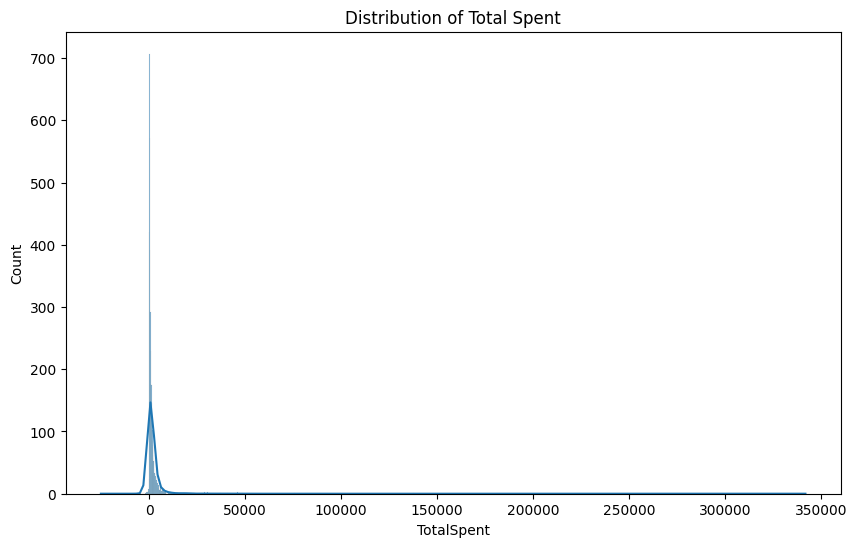

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['TotalSpent'], kde=True)
plt.title('Distribution of Total Spent')
plt.show()

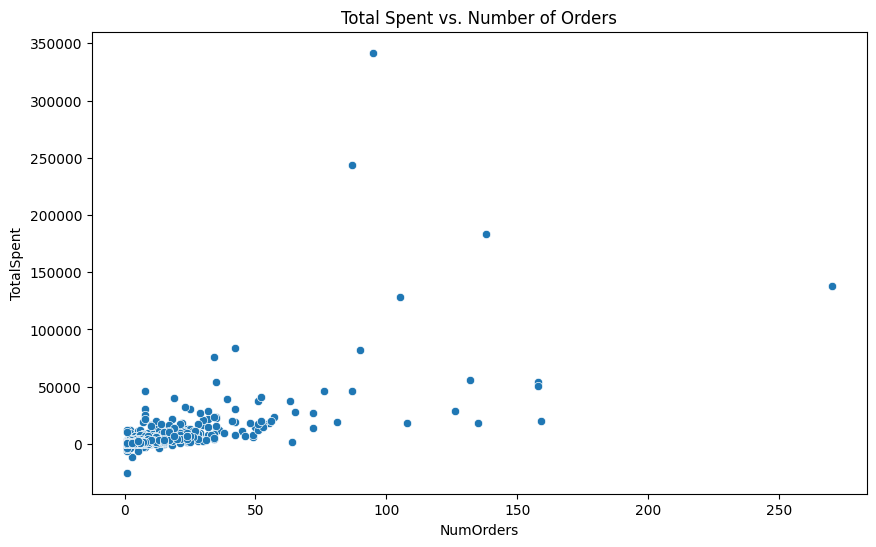

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='NumOrders', y='TotalSpent')
plt.title('Total Spent vs. Number of Orders')
plt.show()

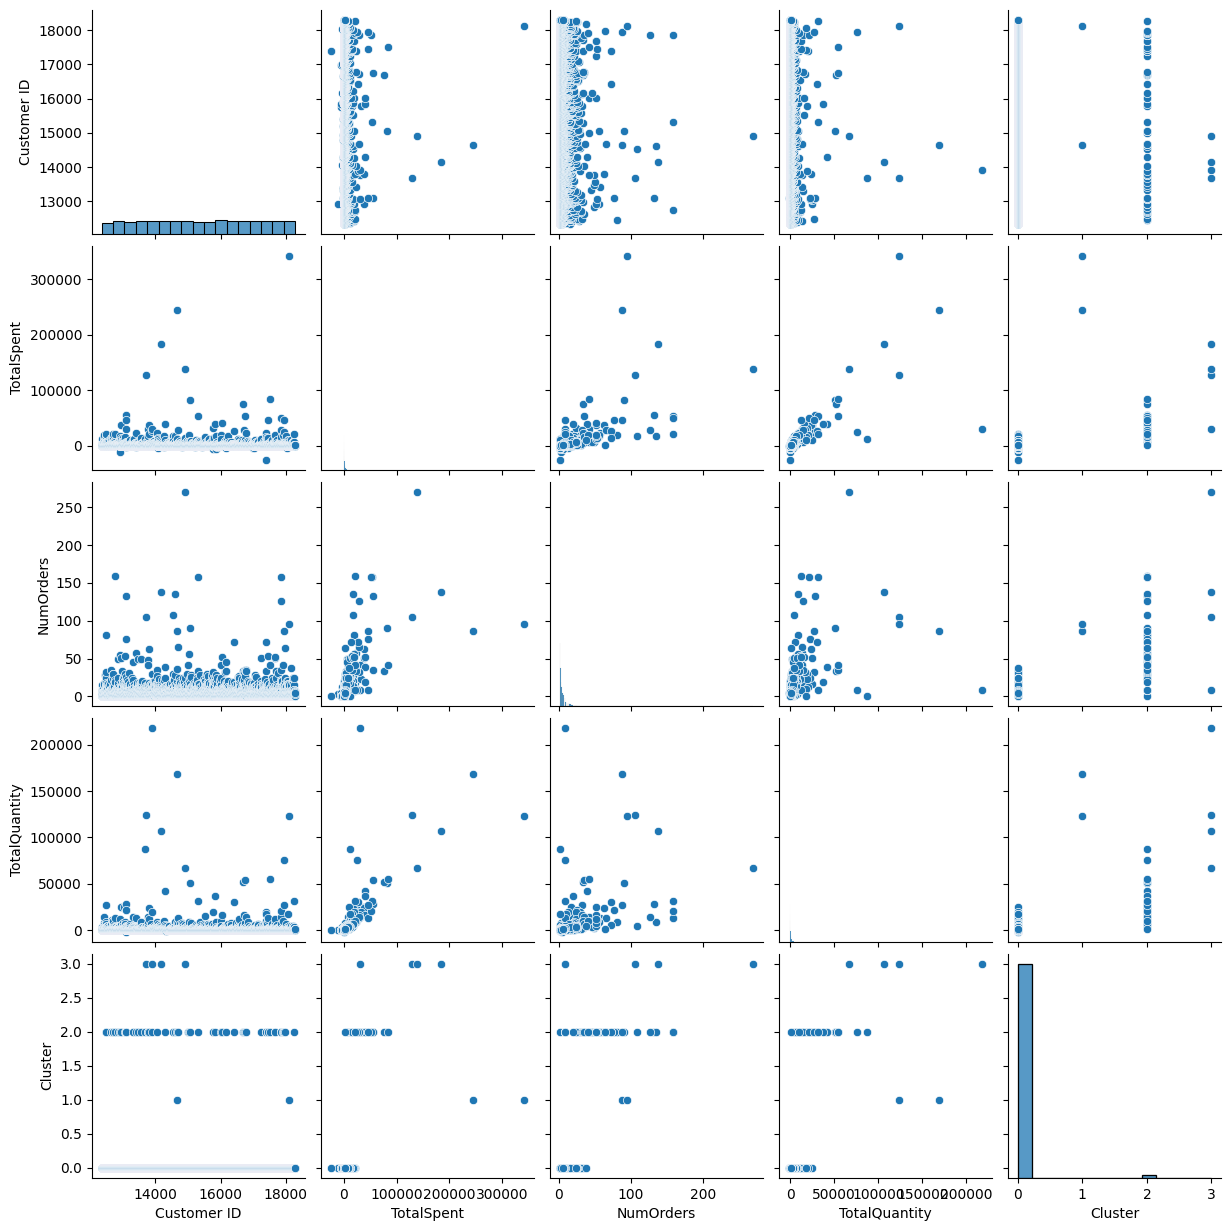

In [ ]:
sns.pairplot(customer_data)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(customer_data[['TotalSpent', 'NumOrders', 'TotalQuantity']])
scaled_data = pd.DataFrame(scaled_features, columns=['TotalSpent', 'NumOrders ', 'TotalQuantity'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
abc=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  abc.append(kmeans.inertia_)

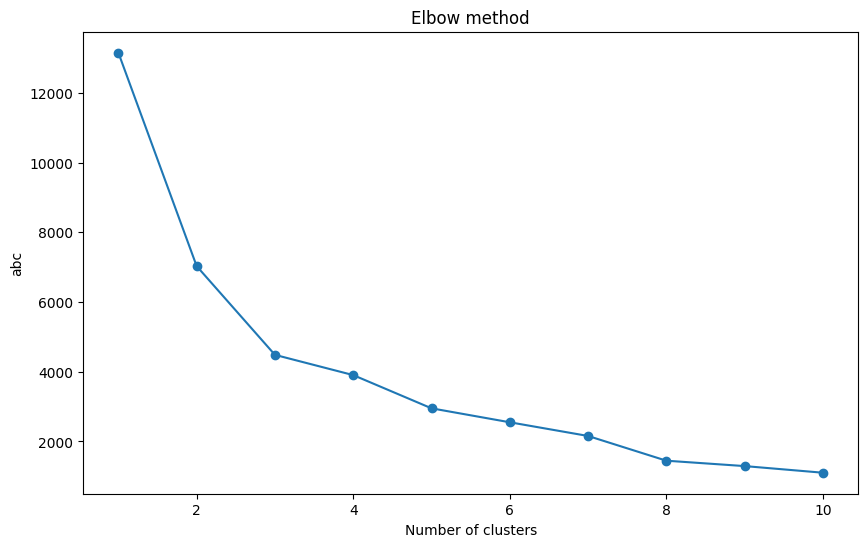

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),abc, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('abc')
plt.show()

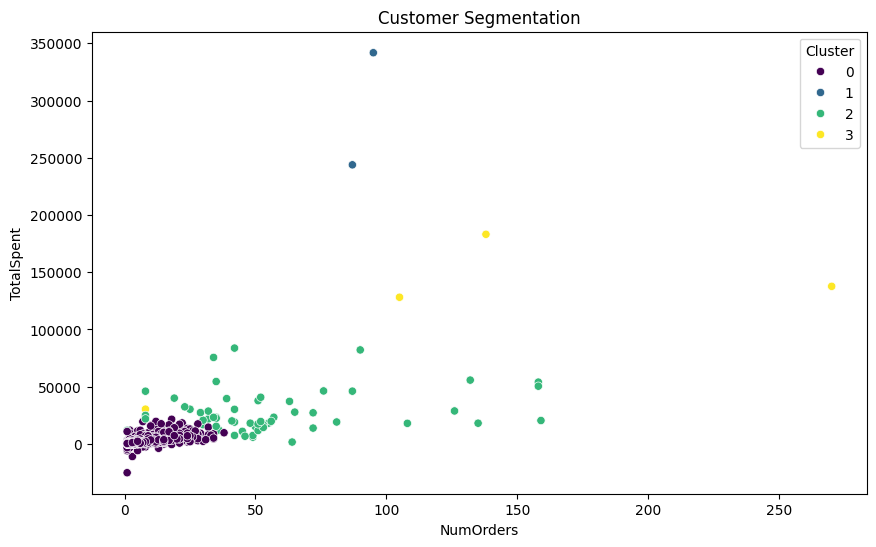

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
customer_data['Cluster']=kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_data, x='NumOrders', y='TotalSpent', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalSpent': 'mean',
    'NumOrders': 'mean',
    'TotalQuantity': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'NumCustomers'})

In [ ]:
cluster_summary

,TotalSpent,NumOrders,TotalQuantity,NumCustomers
Cluster,,,,
0,1308.941211,4.549201,784.395462,4319
1,292814.890000,91.000000,145744.500000,2
2,27525.012466,55.793103,19208.879310,58
3,119864.497500,130.250000,128796.000000,4
